# Análise e Previsão do Nível do Rio
Este notebook tem como objetivo analisar dados históricos do nível de rios e chuvas para treinar um modelo de machine learning capaz de prever o nível do rio em Rio do Sul, com base em medições de outras cidades.

### 1. Leitura e Análise Inicial dos Dados
A primeira etapa consiste em carregar os dados de um arquivo Excel, realizar uma limpeza inicial para remover linhas com dados ausentes ou duplicados e salvar o resultado em um novo arquivo para uso futuro.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados de um arquivo Excel para um DataFrame do Pandas.
df = pd.read_excel('dados_rio_e_chuva.xlsx')

# Remove todas as linhas que contêm valores nulos (NaN) em qualquer uma das colunas.
df = df.dropna()

# Remove linhas duplicadas para garantir a unicidade dos registros.
df = df.drop_duplicates()

# Define as colunas que são críticas para a análise do nível do rio.
# A análise não será prejudicada se o nível de chuva for nulo (0), mas o nível do rio não pode ser.
colunas_para_verificar = ['NivelRiodoSul', 'NívelItuporanga', 'NívelTaió']

# Renomeando nome da coluna ChuvaItuporanaga para ChuvaItuporanga
df.rename(columns={"ChuvaItuporanaga": "ChuvaItuporanga"}, inplace=True)


# Remove as linhas onde o valor em qualquer uma das colunas de nível do rio é igual a 0.
df = df[~(df[colunas_para_verificar] == 0).any(axis=1)]

# Salva o DataFrame limpo em um novo arquivo Excel, sem o índice.
# df.to_excel('dados_tratados.xlsx', index=False)


### 2. Análise Exploratória dos Dados (EDA)
Nesta seção, visualizamos os dados para entender melhor suas distribuições, correlações e relações entre as variáveis.

#### Histograma
O histograma nos ajuda a visualizar a distribuição de frequência do nível do rio em Rio do Sul. Isso nos dá uma ideia de quais níveis são mais comuns.

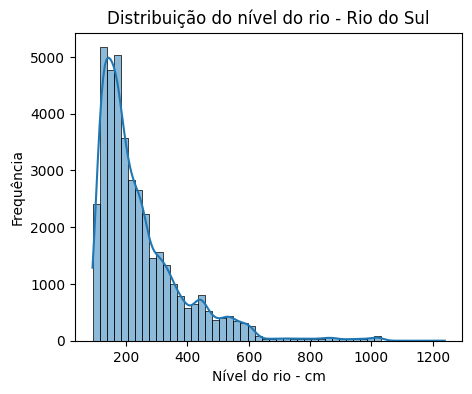

In [6]:
# Cria um histograma para a coluna 'NivelRiodoSul'.
plt.figure(figsize=(5,4))
sns.histplot(df['NivelRiodoSul'], kde=True, bins=50)
plt.title("Distribuição do nível do rio - Rio do Sul")
plt.ylabel("Frequência")
plt.xlabel("Nível do rio - cm")
plt.show()


#### Heatmap de Correlação
O heatmap (mapa de calor) mostra a correlação entre todas as variáveis numéricas. Valores próximos de 1 (ou -1) indicam uma forte correlação positiva (ou negativa), enquanto valores próximos de 0 indicam uma correlação fraca.

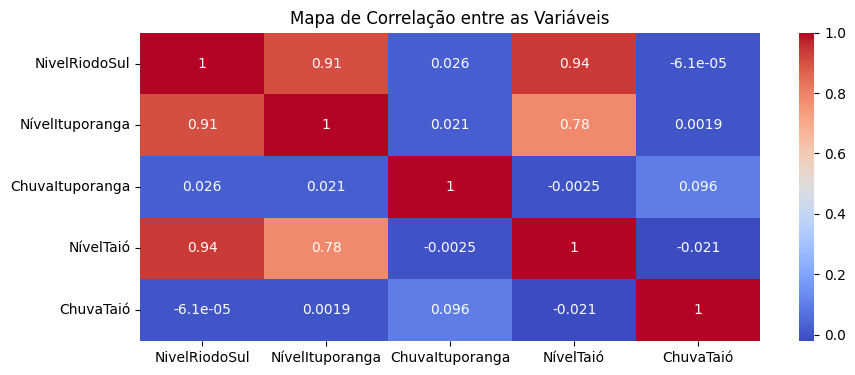

In [7]:
# Calcula a matriz de correlação apenas para as colunas numéricas.
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()


#### Scatter Plots (Gráficos de Dispersão)
Os gráficos de dispersão são usados para visualizar a relação entre duas variáveis. Aqui, plotamos o nível do rio em Rio do Sul contra as medições das outras cidades para identificar possíveis padrões.

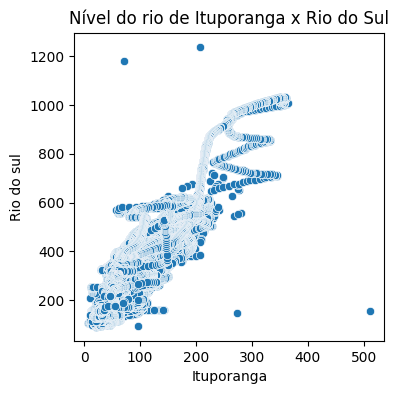

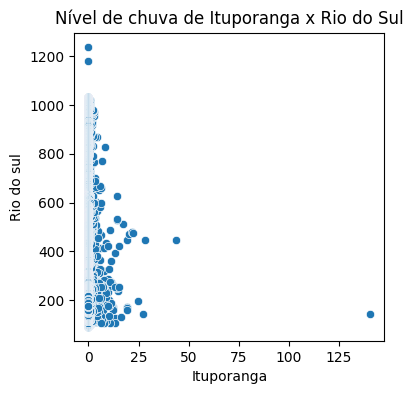

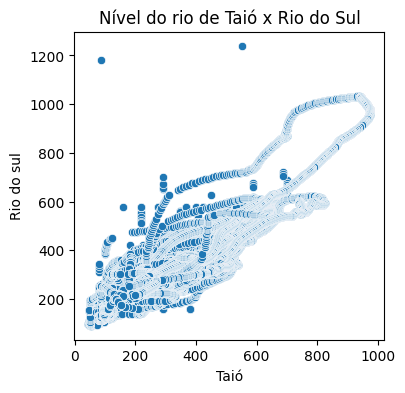

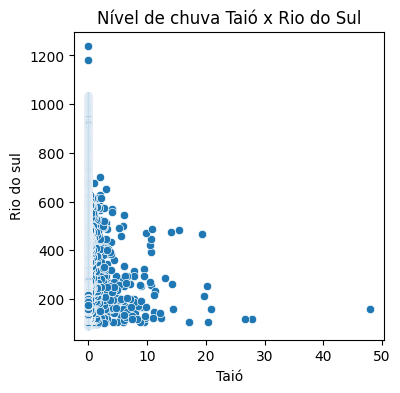

In [8]:
# Gráfico de dispersão: Nível de Ituporanga vs. Nível de Rio do Sul
plt.figure(figsize=(4,4))
sns.scatterplot(x=df['NívelItuporanga'], y=df['NivelRiodoSul'])
plt.title('Nível do rio de Ituporanga x Rio do Sul')
plt.xlabel('Ituporanga')
plt.ylabel('Rio do sul')
plt.show()

# Gráfico de dispersão: Chuva em Ituporanga vs. Nível de Rio do Sul
plt.figure(figsize=(4,4))
sns.scatterplot(x=df['ChuvaItuporanga'], y=df['NivelRiodoSul'])
plt.title('Nível de chuva de Ituporanga x Rio do Sul')
plt.xlabel('Ituporanga')
plt.ylabel('Rio do sul')
plt.show()

# Gráfico de dispersão: Nível de Taió vs. Nível de Rio do Sul
plt.figure(figsize=(4,4))
sns.scatterplot(x=df['NívelTaió'], y=df['NivelRiodoSul'])
plt.title('Nível do rio de Taió x Rio do Sul')
plt.xlabel('Taió')
plt.ylabel('Rio do sul')
plt.show()

# Gráfico de dispersão: Chuva em Taió vs. Nível de Rio do Sul
plt.figure(figsize=(4,4))
sns.scatterplot(x=df['ChuvaTaió'], y=df['NivelRiodoSul'])
plt.title('Nível de chuva Taió x Rio do Sul')
plt.xlabel('Taió')
plt.ylabel('Rio do sul')
plt.show()


#### Boxplot
O boxplot é útil para identificar a dispersão dos dados e a presença de outliers (valores discrepantes) em cada variável.

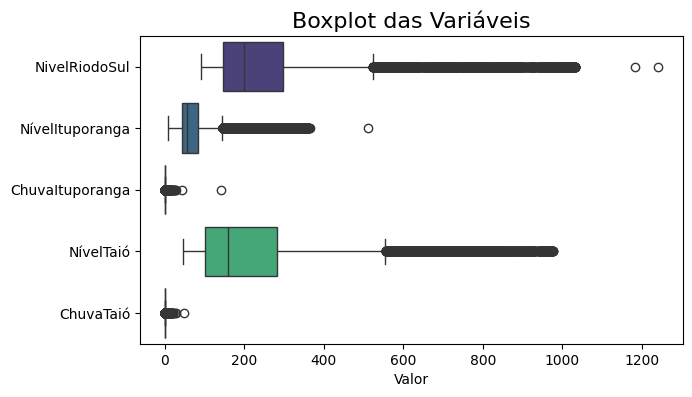

In [14]:
# Cria um boxplot horizontal para todas as variáveis do DataFrame.
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, orient='h', palette='viridis')
plt.title('Boxplot das Variáveis', fontsize=16)
plt.xlabel('Valor')
plt.show()

### 3. Pré-processamento dos Dados
Antes de treinar o modelo, os dados precisam ser preparados. Isso envolve separar as variáveis de entrada (features) da variável de saída (target), dividir os dados em conjuntos de treino e teste, e padronizar as features.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define as variáveis de entrada (X) e a variável alvo (y).
X = df[['NívelItuporanga', 'ChuvaItuporanga', 'NívelTaió', 'ChuvaTaió']]
y = df['NivelRiodoSul']

# Divide os dados em 70% para treino e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializa o padronizador (StandardScaler), que normaliza os dados (média 0, desvio padrão 1).
scaler = StandardScaler()

# Ajusta o scaler AOS DADOS DE TREINO e, em seguida, transforma ambos os conjuntos (treino e teste).
# Isso evita o vazamento de dados (data leakage) do conjunto de teste para o de treino.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 4. Treinamento do Modelo de Regressão Linear
Utilizamos um modelo de Regressão Linear, que é um bom ponto de partida para problemas de previsão. O modelo é treinado com os dados de treino e depois avaliado com os dados de teste.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inicializa e treina o modelo de Regressão Linear.
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Faz previsões com os dados de teste.
y_pred = modelo.predict(X_test_scaled)

# Avalia o desempenho do modelo usando três métricas comuns.
# RMSE (Root Mean Squared Error): A raiz do erro quadrático médio. Penaliza mais os erros grandes.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MAE (Mean Absolute Error): O erro absoluto médio. Mais fácil de interpretar.
mae = mean_absolute_error(y_test, y_pred)
# R² (R-squared): Coeficiente de determinação. Indica a proporção da variância da variável dependente que é previsível a partir das variáveis independentes.
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 29.27
MAE: 18.55
R²: 0.96


#### Seleção das Melhores Combinações de Variáveis
Para otimizar o modelo, testamos todas as combinações possíveis de variáveis de entrada para ver qual delas produz o melhor resultado (maior R²).

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from itertools import combinations

var = ['NívelItuporanga', 'ChuvaItuporanga', 'NívelTaió', 'ChuvaTaió']
resultados = []

# Itera através de todas as combinações de variáveis, de 1 até o número total de variáveis.
for n in tqdm(range(1, len(var)+1), desc="Testando combinações"):
    for combo in combinations(var, n):
        X_combo = df[list(combo)]
        X_combo_scaled = scaler.fit_transform(X_combo)
        X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_combo_scaled, y, test_size=0.3, random_state=42)

        # Treina um modelo para cada combinação.
        modelo_c = LinearRegression()
        modelo_c.fit(X_train_c, y_train_c)
        y_pred_c = modelo_c.predict(X_test_c)

        # Avalia e armazena os resultados.
        r2_c = r2_score(y_test_c, y_pred_c)
        mae_c = mean_absolute_error(y_test_c, y_pred_c)
        rmse_c = np.sqrt(mean_squared_error(y_test_c, y_pred_c))

        resultados.append({
            'variáveis': combo,
            'R2': r2_c,
            'MAE': mae_c,
            'RMSE': rmse_c
        })

# Ordena os resultados pelo R² (do maior para o menor) e exibe os 5 melhores.
melhores = sorted(resultados, key=lambda x: x['R2'], reverse=True)[:5]
for i, r in enumerate(melhores, 1):
    print(f"#{i} | R²: {r['R2']:.2f} | RMSE: {r['RMSE']:.2f} | MAE: {r['MAE']:.2f} | Variáveis: {r['variáveis']}")


Testando combinações: 100%|██████████| 4/4 [00:00<00:00, 18.93it/s]

#1 | R²: 0.96 | RMSE: 29.27 | MAE: 18.55 | Variáveis: ('NívelItuporanga', 'ChuvaItuporanga', 'NívelTaió', 'ChuvaTaió')
#2 | R²: 0.96 | RMSE: 29.27 | MAE: 18.55 | Variáveis: ('NívelItuporanga', 'ChuvaItuporanga', 'NívelTaió')
#3 | R²: 0.96 | RMSE: 29.41 | MAE: 18.62 | Variáveis: ('NívelItuporanga', 'NívelTaió', 'ChuvaTaió')
#4 | R²: 0.96 | RMSE: 29.42 | MAE: 18.62 | Variáveis: ('NívelItuporanga', 'NívelTaió')
#5 | R²: 0.88 | RMSE: 48.34 | MAE: 30.13 | Variáveis: ('ChuvaItuporanga', 'NívelTaió')


### 5. Salvar o Modelo e o Scaler
Finalmente, salvamos o modelo treinado e o scaler em arquivos `.pkl`. Isso permite que eles sejam carregados e usados posteriormente em outra aplicação (como uma API) sem a necessidade de treinar tudo novamente.

In [13]:
import joblib

# Salva o objeto do modelo treinado em um arquivo.
joblib.dump(modelo, 'modelo_nivel_rio.pkl')
# Salva o objeto do scaler ajustado em um arquivo.
joblib.dump(scaler, 'scaler_nivel_rio.pkl')

print("Modelo e scaler salvos com sucesso.")


Modelo e scaler salvos com sucesso.
